In [111]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [118]:
data = pd.read_csv('IPO_10142019.csv')
data.head()

Issuer Company Listing Date  Issue Price  Issue Size   QIB    NII   RII  \
0  Sterling & Wils    20-Aug-19          780     3125.00  1.02   0.89  0.30   
1  Indiamart Inter     7-Apr-19          973      474.12 30.83  62.13 14.07   
2           Neogen     5-Aug-19          215      131.48 30.49 113.88 16.06   
3       Metropolis    15-Apr-19          880     1200.18  8.88   3.03  2.21   
4       Rail Vikas     4-Nov-19           19      430.88  1.36   0.80  2.92   

   EMP  Total  Open Price  Low Price  High Price  Close Price  Change  Year  
0  nan   0.85      700.00     690.10      753.45       725.35   -7.01  2019  
1  nan  36.21     1180.00    1180.00     1338.00      1302.55   33.87  2019  
2  nan  41.18      251.00     261.00      291.85       263.55   22.58  2019  
3  nan   5.84      960.00     935.00      982.00       959.55    9.04  2019  
4  nan   1.82       19.00      18.65       19.80        19.05    0.26  2019

In [119]:
data.describe()

Issue Price  Issue Size     QIB    NII    RII    EMP  Total  \
count       406.00      406.00  372.00 379.00 379.00 159.00 381.00   
mean        262.34      705.82   51.65  48.65   8.09   1.03  22.69   
std         271.28     1623.57  518.60 101.87  13.41   1.56  38.34   
min          10.00        6.00    0.01   0.02   0.03   0.01   0.44   
25%          82.75       67.93    1.33   1.79   1.20   0.33   1.65   
50%         170.00      173.05    5.67   5.10   3.18   0.89   4.80   
75%         330.00      600.00   34.20  48.61   8.71   1.13  29.53   
max        1766.00    15199.44 9999.00 958.07 123.80  16.04 273.05   

       Open Price  Low Price  High Price  Close Price  Change    Year  
count      406.00     406.00      406.00       406.00  406.00  406.00  
mean       298.18     278.24      335.72       307.80   17.67 2011.14  
std        325.33     318.12      353.87       339.79   44.75    3.96  
min          9.50       4.75        9.50         5.25  -69.83 2006.00  
25%         90.00      76.70      107.41        90.78   -7.10 2007.00  
50%        181.55     164.75      207.38       184.70    6.03 2010.00  
75%        399.30     357.21      452.69       415.40   31.46 2015.00  
max       2725.00    2725.00     3020.25      2892.80  286.25 2019.00

In [120]:
data = data.drop(['Issuer Company','Listing Date','EMP'], axis=1)

In [121]:
data.describe()

Issue Price  Issue Size     QIB    NII    RII  Total  Open Price  \
count       406.00      406.00  372.00 379.00 379.00 381.00      406.00   
mean        262.34      705.82   51.65  48.65   8.09  22.69      298.18   
std         271.28     1623.57  518.60 101.87  13.41  38.34      325.33   
min          10.00        6.00    0.01   0.02   0.03   0.44        9.50   
25%          82.75       67.93    1.33   1.79   1.20   1.65       90.00   
50%         170.00      173.05    5.67   5.10   3.18   4.80      181.55   
75%         330.00      600.00   34.20  48.61   8.71  29.53      399.30   
max        1766.00    15199.44 9999.00 958.07 123.80 273.05     2725.00   

       Low Price  High Price  Close Price  Change    Year  
count     406.00      406.00       406.00  406.00  406.00  
mean      278.24      335.72       307.80   17.67 2011.14  
std       318.12      353.87       339.79   44.75    3.96  
min         4.75        9.50         5.25  -69.83 2006.00  
25%        76.70      107.41        90.78   -7.10 2007.00  
50%       164.75      207.38       184.70    6.03 2010.00  
75%       357.21      452.69       415.40   31.46 2015.00  
max      2725.00     3020.25      2892.80  286.25 2019.00

In [123]:
y = data['Change']
x1 = data.drop(['Change'],axis=1)

In [124]:
x1.head()

Issue Price  Issue Size   QIB    NII   RII  Total  Open Price  Low Price  \
0          780     3125.00  1.02   0.89  0.30   0.85      700.00     690.10   
1          973      474.12 30.83  62.13 14.07  36.21     1180.00    1180.00   
2          215      131.48 30.49 113.88 16.06  41.18      251.00     261.00   
3          880     1200.18  8.88   3.03  2.21   5.84      960.00     935.00   
4           19      430.88  1.36   0.80  2.92   1.82       19.00      18.65   

   High Price  Close Price  Year  
0      753.45       725.35  2019  
1     1338.00      1302.55  2019  
2      291.85       263.55  2019  
3      982.00       959.55  2019  
4       19.80        19.05  2019

In [125]:
data.isnull().sum()

Issue Price     0
Issue Size      0
QIB            34
NII            27
RII            27
Total          25
Open Price      0
Low Price       0
High Price      0
Close Price     0
Change          0
Year            0
dtype: int64

In [126]:
data=data.dropna(axis=0)

In [127]:
data.describe(include='all')

Issue Price  Issue Size     QIB    NII    RII  Total  Open Price  \
count       370.00      370.00  370.00 370.00 370.00 370.00      370.00   
mean        281.70      749.14   51.90  49.79   8.20  23.30      320.44   
std         276.25     1664.22  520.00 102.84  13.55  38.74      332.11   
min          10.00       14.00    0.01   0.03   0.03   0.44        9.50   
25%         100.00       82.01    1.33   1.84   1.18   1.76      104.25   
50%         184.00      222.29    5.67   5.41   3.13   5.04      201.12   
75%         373.75      645.77   34.91  49.64   9.05  31.04      416.71   
max        1766.00    15199.44 9999.00 958.07 123.80 273.05     2725.00   

       Low Price  High Price  Close Price  Change    Year  
count     370.00      370.00       370.00  370.00  370.00  
mean      299.91      359.81       331.07   16.87 2011.36  
std       324.87      361.37       346.89   39.15    4.00  
min         7.95        9.50         8.30  -63.78 2007.00  
25%        90.00      119.73       101.35   -6.46 2008.00  
50%       184.70      225.00       206.05    6.22 2010.00  
75%       395.50      486.74       445.54   31.17 2016.00  
max      2725.00     3020.25      2892.80  241.75 2019.00

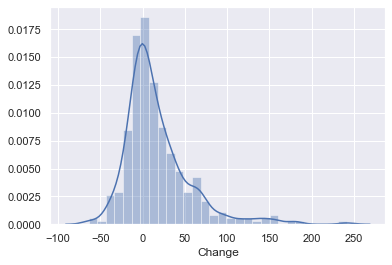

In [128]:
sns.distplot(data['Change'])

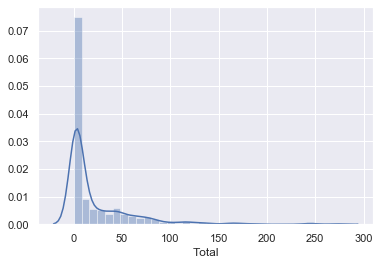

In [129]:
sns.distplot(data['Total'])

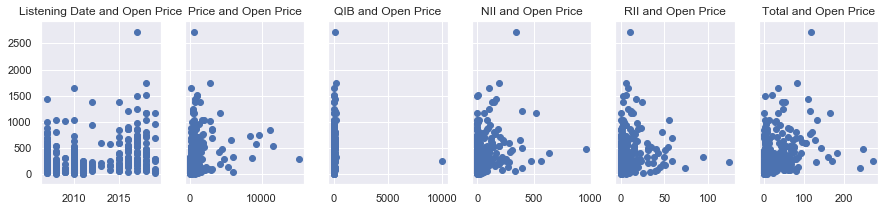

In [130]:
f, (ax1, ax2, ax3, ax4, ax5, ax6 ) = plt.subplots(1, 6, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Year'],data['Open Price'])
ax1.set_title('Listening Date and Open Price')

ax2.scatter(data['Issue Size'],data['Open Price'])
ax2.set_title('Price and Open Price')

ax3.scatter(data['QIB'],data['Open Price'])
ax3.set_title('QIB and Open Price')

ax4.scatter(data['NII'],data['Open Price'])
ax4.set_title('NII and Open Price')

ax5.scatter(data['RII'],data['Open Price'])
ax5.set_title('RII and Open Price')

ax6.scatter(data['Total'],data['Open Price'])
ax6.set_title('Total and Open Price')


plt.show()

# Multicollinearity

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data.columns.values

array(['Issue Price', 'Issue Size', 'QIB', 'NII', 'RII', 'Total',
       'Open Price', 'Low Price', 'High Price', 'Close Price', 'Change',
       'Year'], dtype=object)

In [142]:
variables = data[['Issue Price', 'Issue Size', 'QIB', 'RII', 'Total',
       'Change','Year']]
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

variables.head()

Issue Price  Issue Size   QIB   RII  Total  Change  Year
0          780     3125.00  1.02  0.30   0.85   -7.01  2019
1          973      474.12 30.83 14.07  36.21   33.87  2019
2          215      131.48 30.49 16.06  41.18   22.58  2019
3          880     1200.18  8.88  2.21   5.84    9.04  2019
4           19      430.88  1.36  2.92   1.82    0.26  2019

In [143]:
variables.describe()

Issue Price  Issue Size     QIB    RII  Total  Change    Year
count       370.00      370.00  370.00 370.00 370.00  370.00  370.00
mean        281.70      749.14   51.90   8.20  23.30   16.87 2011.36
std         276.25     1664.22  520.00  13.55  38.74   39.15    4.00
min          10.00       14.00    0.01   0.03   0.44  -63.78 2007.00
25%         100.00       82.01    1.33   1.18   1.76   -6.46 2008.00
50%         184.00      222.29    5.67   3.13   5.04    6.22 2010.00
75%         373.75      645.77   34.91   9.05  31.04   31.17 2016.00
max        1766.00    15199.44 9999.00 123.80 273.05  241.75 2019.00

In [144]:
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF     Features
0 2.35  Issue Price
1 1.32   Issue Size
2 1.22          QIB
3 3.25          RII
4 3.22        Total
5 2.04       Change
6 2.50         Year

In [145]:
data_no_multicollinearity = data.drop(['NII'],axis=1)

In [146]:
data_no_multicollinearity.head()

Issue Price  Issue Size   QIB   RII  Total  Open Price  Low Price  \
0          780     3125.00  1.02  0.30   0.85      700.00     690.10   
1          973      474.12 30.83 14.07  36.21     1180.00    1180.00   
2          215      131.48 30.49 16.06  41.18      251.00     261.00   
3          880     1200.18  8.88  2.21   5.84      960.00     935.00   
4           19      430.88  1.36  2.92   1.82       19.00      18.65   

   High Price  Close Price  Change  Year  
0      753.45       725.35   -7.01  2019  
1     1338.00      1302.55   33.87  2019  
2      291.85       263.55   22.58  2019  
3      982.00       959.55    9.04  2019  
4       19.80        19.05    0.26  2019

# Data with Dummies

In [147]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [148]:
data_with_dummies.head()

Issue Price  Issue Size   QIB   RII  Total  Open Price  Low Price  \
0          780     3125.00  1.02  0.30   0.85      700.00     690.10   
1          973      474.12 30.83 14.07  36.21     1180.00    1180.00   
2          215      131.48 30.49 16.06  41.18      251.00     261.00   
3          880     1200.18  8.88  2.21   5.84      960.00     935.00   
4           19      430.88  1.36  2.92   1.82       19.00      18.65   

   High Price  Close Price  Change  Year  
0      753.45       725.35   -7.01  2019  
1     1338.00      1302.55   33.87  2019  
2      291.85       263.55   22.58  2019  
3      982.00       959.55    9.04  2019  
4       19.80        19.05    0.26  2019

In [149]:
data_preprocessed = data_with_dummies

In [150]:
targets = data_preprocessed['Change']
inputs = data_preprocessed.drop(['Change'], axis=1)

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
Scaler = StandardScaler()

In [153]:
Scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [154]:
inputs.describe()

Issue Price  Issue Size     QIB    RII  Total  Open Price  Low Price  \
count       370.00      370.00  370.00 370.00 370.00      370.00     370.00   
mean        281.70      749.14   51.90   8.20  23.30      320.44     299.91   
std         276.25     1664.22  520.00  13.55  38.74      332.11     324.87   
min          10.00       14.00    0.01   0.03   0.44        9.50       7.95   
25%         100.00       82.01    1.33   1.18   1.76      104.25      90.00   
50%         184.00      222.29    5.67   3.13   5.04      201.12     184.70   
75%         373.75      645.77   34.91   9.05  31.04      416.71     395.50   
max        1766.00    15199.44 9999.00 123.80 273.05     2725.00    2725.00   

       High Price  Close Price    Year  
count      370.00       370.00  370.00  
mean       359.81       331.07 2011.36  
std        361.37       346.89    4.00  
min          9.50         8.30 2007.00  
25%        119.73       101.35 2008.00  
50%        225.00       206.05 2010.00  
75%        486.74       445.54 2016.00  
max       3020.25      2892.80 2019.00

In [155]:
input_scaled=Scaler.transform(inputs)

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test, y_train,y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=376)

In [158]:
x_train, y_train

(array([[-0.07865955,  0.16815407, -0.05728734, ..., -0.16850203,
         -0.13890353, -0.34113255],
        [-0.72388538, -0.41375206, -0.09876677, ..., -0.74570053,
         -0.7134978 , -0.59156717],
        [-0.9848756 , -0.41153782, -0.09793873, ..., -0.9119603 ,
         -0.8825131 , -0.09069794],
        ...,
        [ 2.54936699, -0.15178569, -0.09632114, ...,  1.84324118,
          1.64578832,  1.41190974],
        [-0.6405135 ,  0.53557967, -0.0242617 , ..., -0.64123397,
         -0.60582452, -0.84200178],
        [-0.53176758, -0.08414304, -0.08582612, ..., -0.56821823,
         -0.52557473,  0.15973667]]), 186     8.83
 242     2.32
 155   153.50
 42     -1.43
 303    56.56
 296    93.54
 395     4.44
 104    -3.08
 236    16.12
 23     -2.85
 399    41.56
 39      0.03
 205    10.52
 139     7.35
 257   129.25
 1      33.87
 297    -7.57
 70     12.27
 315   182.00
 249    -9.25
 84     58.68
 26     -8.71
 213     2.81
 301    42.32
 222     6.10
 370    -8.85
 57      0

In [159]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((296, 10), (74, 10), (296,), (74,))

# Create the Regression

In [160]:
reg = LinearRegression()

In [161]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_hat = reg.predict(x_train)

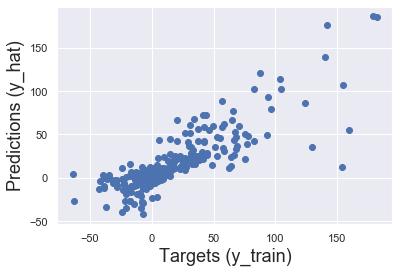

In [163]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

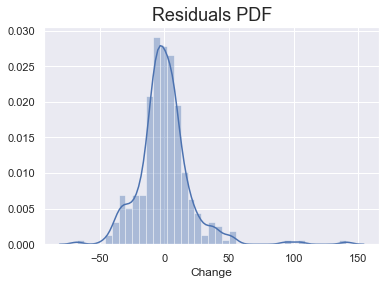

In [164]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)


In [165]:
reg.score(x_train,y_train)

0.6959793476292186

In [166]:
reg.intercept_

16.960255908270494

In [167]:
reg.coef_

array([-44.51450776,   2.01863674,   2.55227826,  13.07734305,
         1.30961418, -43.14184025, -41.43234517, -31.32104423,
       165.41754871,   1.03745613])

In [168]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features  Weights
0  Issue Price   -44.51
1   Issue Size     2.02
2          QIB     2.55
3          RII    13.08
4        Total     1.31
5   Open Price   -43.14
6    Low Price   -41.43
7   High Price   -31.32
8  Close Price   165.42
9         Year     1.04

In [169]:
inputs.columns.values

array(['Issue Price', 'Issue Size', 'QIB', 'RII', 'Total', 'Open Price',
       'Low Price', 'High Price', 'Close Price', 'Year'], dtype=object)

# Testing

In [170]:
y_hat_test = reg.predict(x_test)

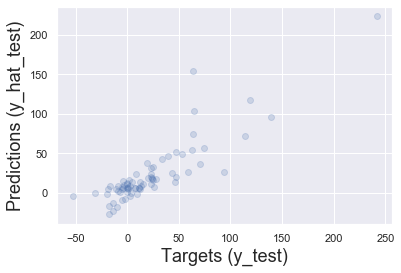

In [171]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [172]:
pf_df = pd.DataFrame(y_hat_test, columns=['Prediction'])
pf_df.head()

Prediction
0        5.83
1       13.08
2       24.44
3        4.68
4       14.51

In [173]:
pf_df.head()

Prediction
0        5.83
1       13.08
2       24.44
3        4.68
4       14.51

In [174]:
pf_df['Target'] = (y_test)
pf_df.head()

Prediction  Target
0        5.83     nan
1       13.08     nan
2       24.44     nan
3        4.68     nan
4       14.51    0.26

In [175]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.34
1   12.70
2   43.07
3    1.17
4   -3.94
Name: Change, dtype: float64

In [176]:
pf_df['Target'] = (y_test)
pf_df.head()

Prediction  Target
0        5.83    7.34
1       13.08   12.70
2       24.44   43.07
3        4.68    1.17
4       14.51   -3.94

In [177]:
pf_df['Residuals'] = pf_df['Prediction'] - pf_df['Target']
pf_df['Residuals %'] = np.absolute((pf_df['Prediction'] - pf_df['Target'])/pf_df['Target']*100)

In [178]:
pf_df.head()

Prediction  Target  Residuals  Residuals %
0        5.83    7.34      -1.51        20.61
1       13.08   12.70       0.38         3.03
2       24.44   43.07     -18.63        43.26
3        4.68    1.17       3.51       299.69
4       14.51   -3.94      18.45       468.22

In [179]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
pf_df.sort_values(by=['Residuals %'])
pf_df.describe()

Prediction  Target  Residuals  Residuals %
count       74.00   74.00      74.00        74.00
mean        22.21   21.76       0.45       546.65
std         39.03   43.35      21.07      3028.20
min        -27.32  -52.86     -67.83         0.67
25%          4.71   -3.60      -8.03        27.98
50%         10.58   10.55       0.11        62.45
75%         25.40   32.00      10.08       151.66
max        223.22  241.75      90.72     25835.51

In [180]:
type(pf_df)

pandas.core.frame.DataFrame

In [181]:
type(x_test)
pf_df.shape

(74, 4)

In [182]:
type(pf_df)
#type(x_test)

pandas.core.frame.DataFrame

In [55]:
pf_df.to_csv('Test.csv')